<a href="https://colab.research.google.com/github/provincit/colab_public/blob/main/MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X = np.concatenate((x_train, x_test))
# y = np.concatenate((y_train, y_test))


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [5]:
def get_time(time):
 return hf.format_timespan(time, detailed=True)
def find_misses(test, pred):
 return [i for i, row in enumerate(test) if row != pred[i]]

In [6]:
# y_train.shape

<<RandomForestClassifier>>
'test' accuracy: 0.9705
RandomForestClassifier timer: 36.42675042152405 

<<ExtraTreesClassifier>>
'test' accuracy: 0.9706
ExtraTreesClassifier timer: 27.37384246099998 

pred actual
8   9
6   4
0   6
4   8
1   9

actual 9
pred 8


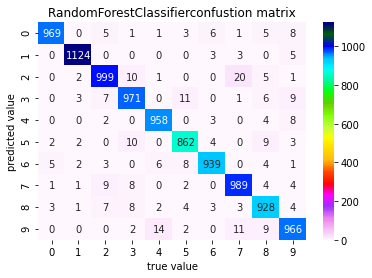

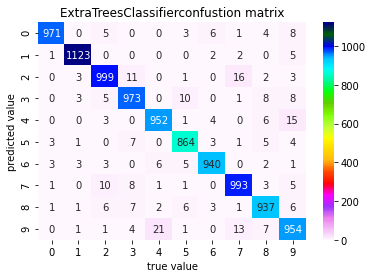

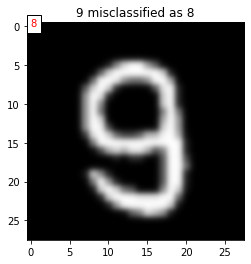

In [7]:
# X = np.load('data/X_mnist.npy')
# y = np.load('data/y_mnist.npy')
# X = X.astype(np.float32)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf_name = rf.__class__.__name__
print ('<<' + rf_name + '>>')
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
elapsed_ls = end - start
timer = elapsed_ls
rf_name = rf.__class__.__name__
y_pred = rf.predict(X_test)


br = '\n'
accuracy = accuracy_score(y_test, y_pred)
print ('\'test\' accuracy:', accuracy)
print (rf_name + ' timer:', timer, br)
cm = confusion_matrix(y_test, y_pred)
plt.figure(1)
ax = plt.axes()
sns.heatmap(cm.T, annot=True, fmt="d", cmap='gist_ncar_r', ax=ax)
ax.set_title(rf_name + 'confustion matrix')
plt.xlabel('true value')
plt.ylabel('predicted value')
et = ExtraTreesClassifier(random_state=0, n_estimators=100)
et_name = et.__class__.__name__
print ('<<' + et_name + '>>')
start = time.perf_counter()
et.fit(X_train, y_train)
end = time.perf_counter()
elapsed_ls = end - start
timer = elapsed_ls
y_pred = et.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ('\'test\' accuracy:', accuracy)
print (et_name + ' timer:', timer, br)
cm = confusion_matrix(y_test, y_pred)
plt.figure(2)
ax = plt.axes()
sns.heatmap(cm.T, annot=True, fmt="d", cmap='gist_ncar_r', ax=ax)
ax.set_title(et_name + 'confustion matrix')
plt.xlabel('true value')
plt.ylabel('predicted value')
indx = find_misses(y_test, y_pred)
print ('pred', 'actual')
misses = [(y_pred[row], y_test[row], i)
for i, row in enumerate(indx)]
[print (row[0], ' ', row[1]) for i, row in enumerate(misses)
if i < 5]
print()

img_act = y_test[indx[0]]
img_pred = y_pred[indx[0]]
print ('actual', img_act)
print ('pred', img_pred)
text = str(img_pred)
test_images = X_test.reshape(-1, 28, 28)
plt.figure(3)
plt.imshow(test_images[indx[0]], cmap='gray', interpolation='gaussian')
plt.text(0, 0.05, text, color='r', bbox=dict(facecolor='white'))
title = str(img_act) + ' misclassified as ' + text
plt.title(title)
plt.show()

Try with grid CV

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
rfc=RandomForestClassifier(random_state=0)

In [10]:
param_grid = { 
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9 ,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')